##### GOAL - Predict whether a telecome customer will churn(Yes/No) based on demographic, service, and billing information

#### import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("TelcomCustomer-Churn_1.csv")
df2 = pd.read_csv("TelcomCustomer-Churn_2.csv")

In [3]:
df1.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No


In [4]:
df2.head(1)

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [5]:
coustomer = df1.merge(df2,how='inner')
coustomer_cp = coustomer.copy()
coustomer_cp.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [52]:
coustomer_cp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   PaperlessBilling                       7032 non-null   int64  
 7   MonthlyCharges                         7032 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7032 non-null   int64  
 10  InternetService_Fiber optic            7032 non-null   int64  
 11  InternetS

#### Data Cleaning

In [53]:
coustomer_cp.duplicated().sum()

np.int64(22)

In [8]:
coustomer_cp['MonthlyCharges']=coustomer_cp['MonthlyCharges'].astype(float)

In [48]:
coustomer_cp['TotalCharges'] = pd.to_numeric(coustomer_cp['TotalCharges'],errors='coerce')

In [49]:
coustomer_cp = coustomer_cp.dropna(subset='TotalCharges')

#### Data Understanding

In [13]:
coustomer_cp['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [14]:
coustomer_cp['Churn'].value_counts(normalize=True)*100

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64

In [15]:
coustomer_cp.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [16]:
coustomer_cp.groupby('Churn').count()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
Churn,,,,,,,,,,,,,,,,,,,,
No,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163
Yes,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869


#### Univariate Analysis

In [17]:
print(coustomer_cp['Contract'].value_counts())
print(coustomer_cp['InternetService'].value_counts())

Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64


([0, 1, 2, 3],
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

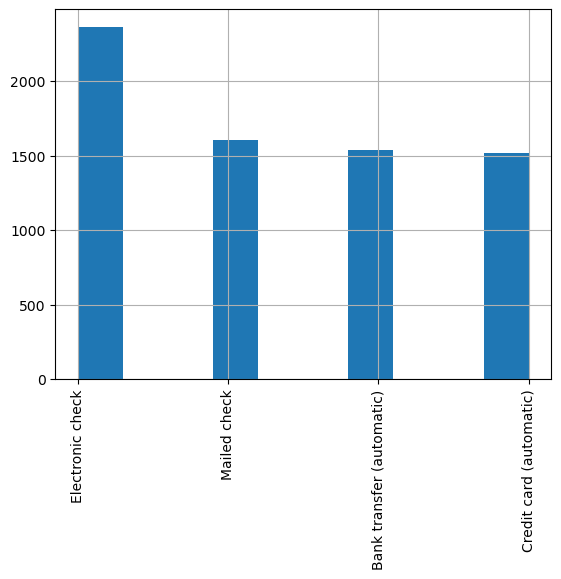

In [18]:
coustomer_cp['PaymentMethod'].hist()
plt.xticks(rotation=90)

<Axes: >

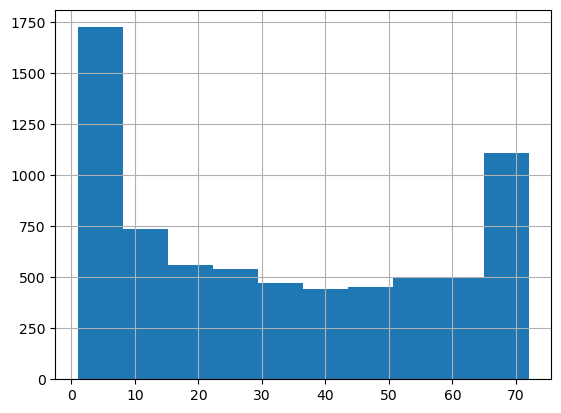

In [19]:
coustomer_cp['tenure'].hist()

<Axes: >

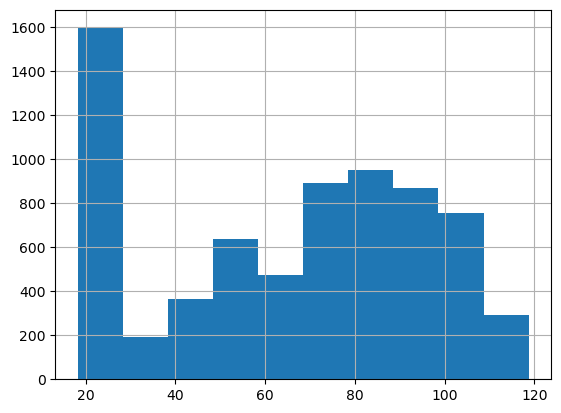

In [20]:
coustomer_cp['MonthlyCharges'].hist()

##### Bivariate Anaysis

In [21]:
pd.crosstab(coustomer_cp['Contract'],coustomer_cp['Churn'],normalize='index')

Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887228,0.112772
Two year,0.971513,0.028487


In [22]:
pd.crosstab(coustomer_cp['InternetService'],coustomer_cp['Churn'],normalize='index')

Churn,No,Yes
InternetService,,
DSL,0.810017,0.189983
Fiber optic,0.581072,0.418928
No,0.925658,0.074342


In [23]:
coustomer_cp.groupby('Churn')[['MonthlyCharges',]].mean()

,MonthlyCharges
Churn,
No,61.307408
Yes,74.441332


In [24]:
pd.crosstab(coustomer_cp['TechSupport'],coustomer_cp['Churn'],normalize='index')

Churn,No,Yes
TechSupport,,
No,0.583525,0.416475
No internet service,0.925658,0.074342
Yes,0.848039,0.151961


In [25]:
coustomer_cp.corr(numeric_only=True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


#### Feature Engineering

In [34]:
coustomer_cp.drop('customerID',axis=1,inplace=True)

In [35]:
binary_cols = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']
for col in binary_cols:
    coustomer_cp[col]=coustomer_cp[col].map({'Yes':1,'No':0})

In [36]:
coustomer_cp['gender']=coustomer_cp['gender'].map({'Female':0,'Male':1})

In [29]:
cat_col = [
    'InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod','OnlineBackup','MultipleLines'
]
coustomer_cp = pd.get_dummies(coustomer,columns=cat_col,drop_first=True)

In [30]:
dummmy_cols = coustomer_cp.select_dtypes(include='bool').columns
coustomer_cp[dummmy_cols] = coustomer_cp[dummmy_cols].astype(int)

#### create new feature

#### Long Term Coustomer

In [31]:
coustomer_cp['LongTermCoustomer'] = coustomer_cp['tenure'].apply(lambda x:1 if x>=24 else 0)

#### High Charge Coustomer

In [32]:
coustomer_cp['HighChargeCoustmer'] = coustomer_cp['MonthlyCharges'].apply(lambda x : 1 if x>coustomer_cp['MonthlyCharges'].median() else 0)

### Scaling for model

In [55]:
coustomer_cp.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,OnlineBackup_No internet service,OnlineBackup_Yes,MultipleLines_No phone service,MultipleLines_Yes,LongTermCoustomer,HighChargeCoustmer
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,1,0,0,1,1,0,0,0


In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['tenure','MonthlyCharges','TotalCharges']

coustomer_cp[num_cols] = scaler.fit_transform(coustomer_cp[num_cols])

#### Applying Machine Learning 

In [57]:
X = coustomer_cp.drop('Churn',axis=1)
y = coustomer_cp[['Churn']]

In [58]:
y.head(2)

,Churn
0,0
1,0


In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))

[[918 115]
 [160 214]]


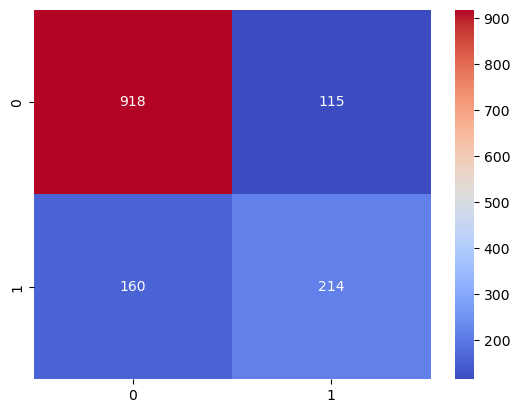

In [65]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='coolwarm')
plt.show()

In [62]:
print(accuracy_score(y_test,y_pred))

0.8045486851457001


In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

